In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp
from scipy.optimize import curve_fit

In [2]:
t1_df = pd.read_hdf('t1_run884.h5', key='/ORSIS3302DecoderForEnergy')
t2_df = pd.read_hdf('t2_run884.h5', key='data')
energy = t2_df.energy
e_ftp = t2_df.e_ftp
current_max = t2_df.current_max

waveform = t1_df.iloc[50, 9:]

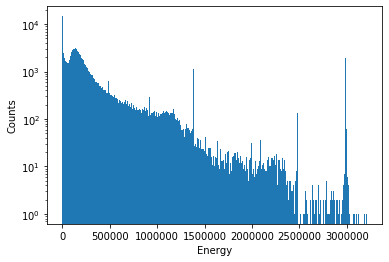

In [3]:
plt.hist(energy, 1000)
plt.xlabel('Energy')
plt.ylabel('Counts')
plt.yscale('log')
plt.show()

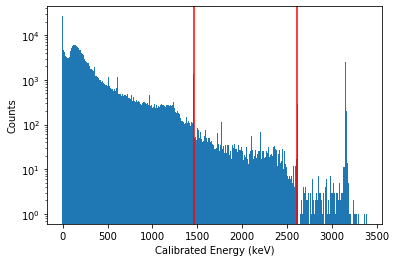

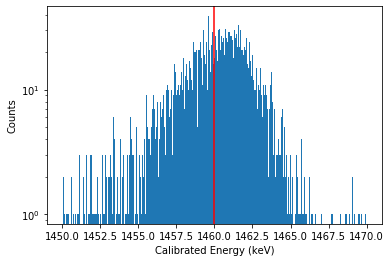

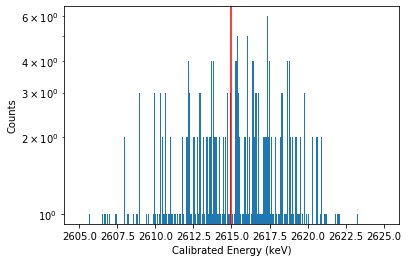

In [5]:
energy_list = energy.tolist()

def func(x):
    return 0.001056164158 * x - 4.77294

calibrated_energy = []
for entry in energy_list:
    calibrated_energy.append(func(entry))

plt.axvline(1460, c='r')
plt.axvline(2615, c='r')
plt.hist(calibrated_energy, 500)
plt.xlabel('Calibrated Energy (keV)')
plt.ylabel('Counts')
plt.yscale('log')
plt.show()

plt.axvline(1460, c='r')
plt.hist(calibrated_energy, 500, [1450, 1470])
plt.xlabel('Calibrated Energy (keV)')
plt.ylabel('Counts')
plt.yscale('log')
plt.show()

plt.axvline(2615, c='r')
plt.hist(calibrated_energy, 500, [2605, 2625])
plt.xlabel('Calibrated Energy (keV)')
plt.ylabel('Counts')
plt.yscale('log')
plt.show()

In [ ]:
hist = TH1D('h1d', 'Calibrated Energy Spectrum', 600, 0, 3000000)
for i in range(len(calibrated_energy)):
    hist.Fill(calibrated_energy[i])
hist.SetTitle('Calibrated Energy Spectrum')
hist.GetYaxis().SetTitle('Count')
hist.GetXaxis().SetTitle('Calibrated Energy (keV)')

K_fit = TF1('K', 'gaus(0)+expo(3)', 1340000, 1410000)
K_fit.SetParameters(500, 1460, 3500, 10, -1./400000.)

Tl_fit = TF1('Tl', 'gaus(0)+expo(3)', 2400000, 2500000)
Tl_fit.SetParameters(30, 2615, 10000, 10, -1./400000.)

background_fit = TF1('K', 'gaus(0)+expo(3)', 1340000, 1410000)
background_fit.SetParameters()

run_canvas = TCanvas("run_canvas", "run canvas")
run_canvas.SetLogy()
hist.Fit(K_fit, 'LR')
hist.Fit(Tl_fit, 'LR+')
hist.Draw()

run_canvas.Print(('~/phys-measurement/calibrated_fit.pdf' + '['))
run_canvas.Print(('~/phys-measurement/calibrated_fit.pdf'))
run_canvas.Print(('~/phys-measurement/calibrated_fit.pdf' + ']'))

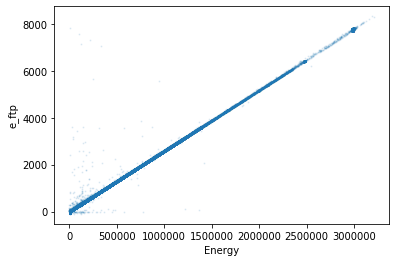

In [6]:
plt.scatter(energy, e_ftp, alpha=0.1, s=1)
plt.xlabel('Energy')
plt.ylabel('e_ftp')
plt.show()

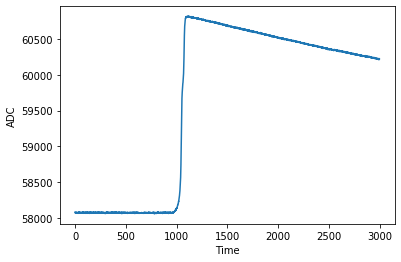

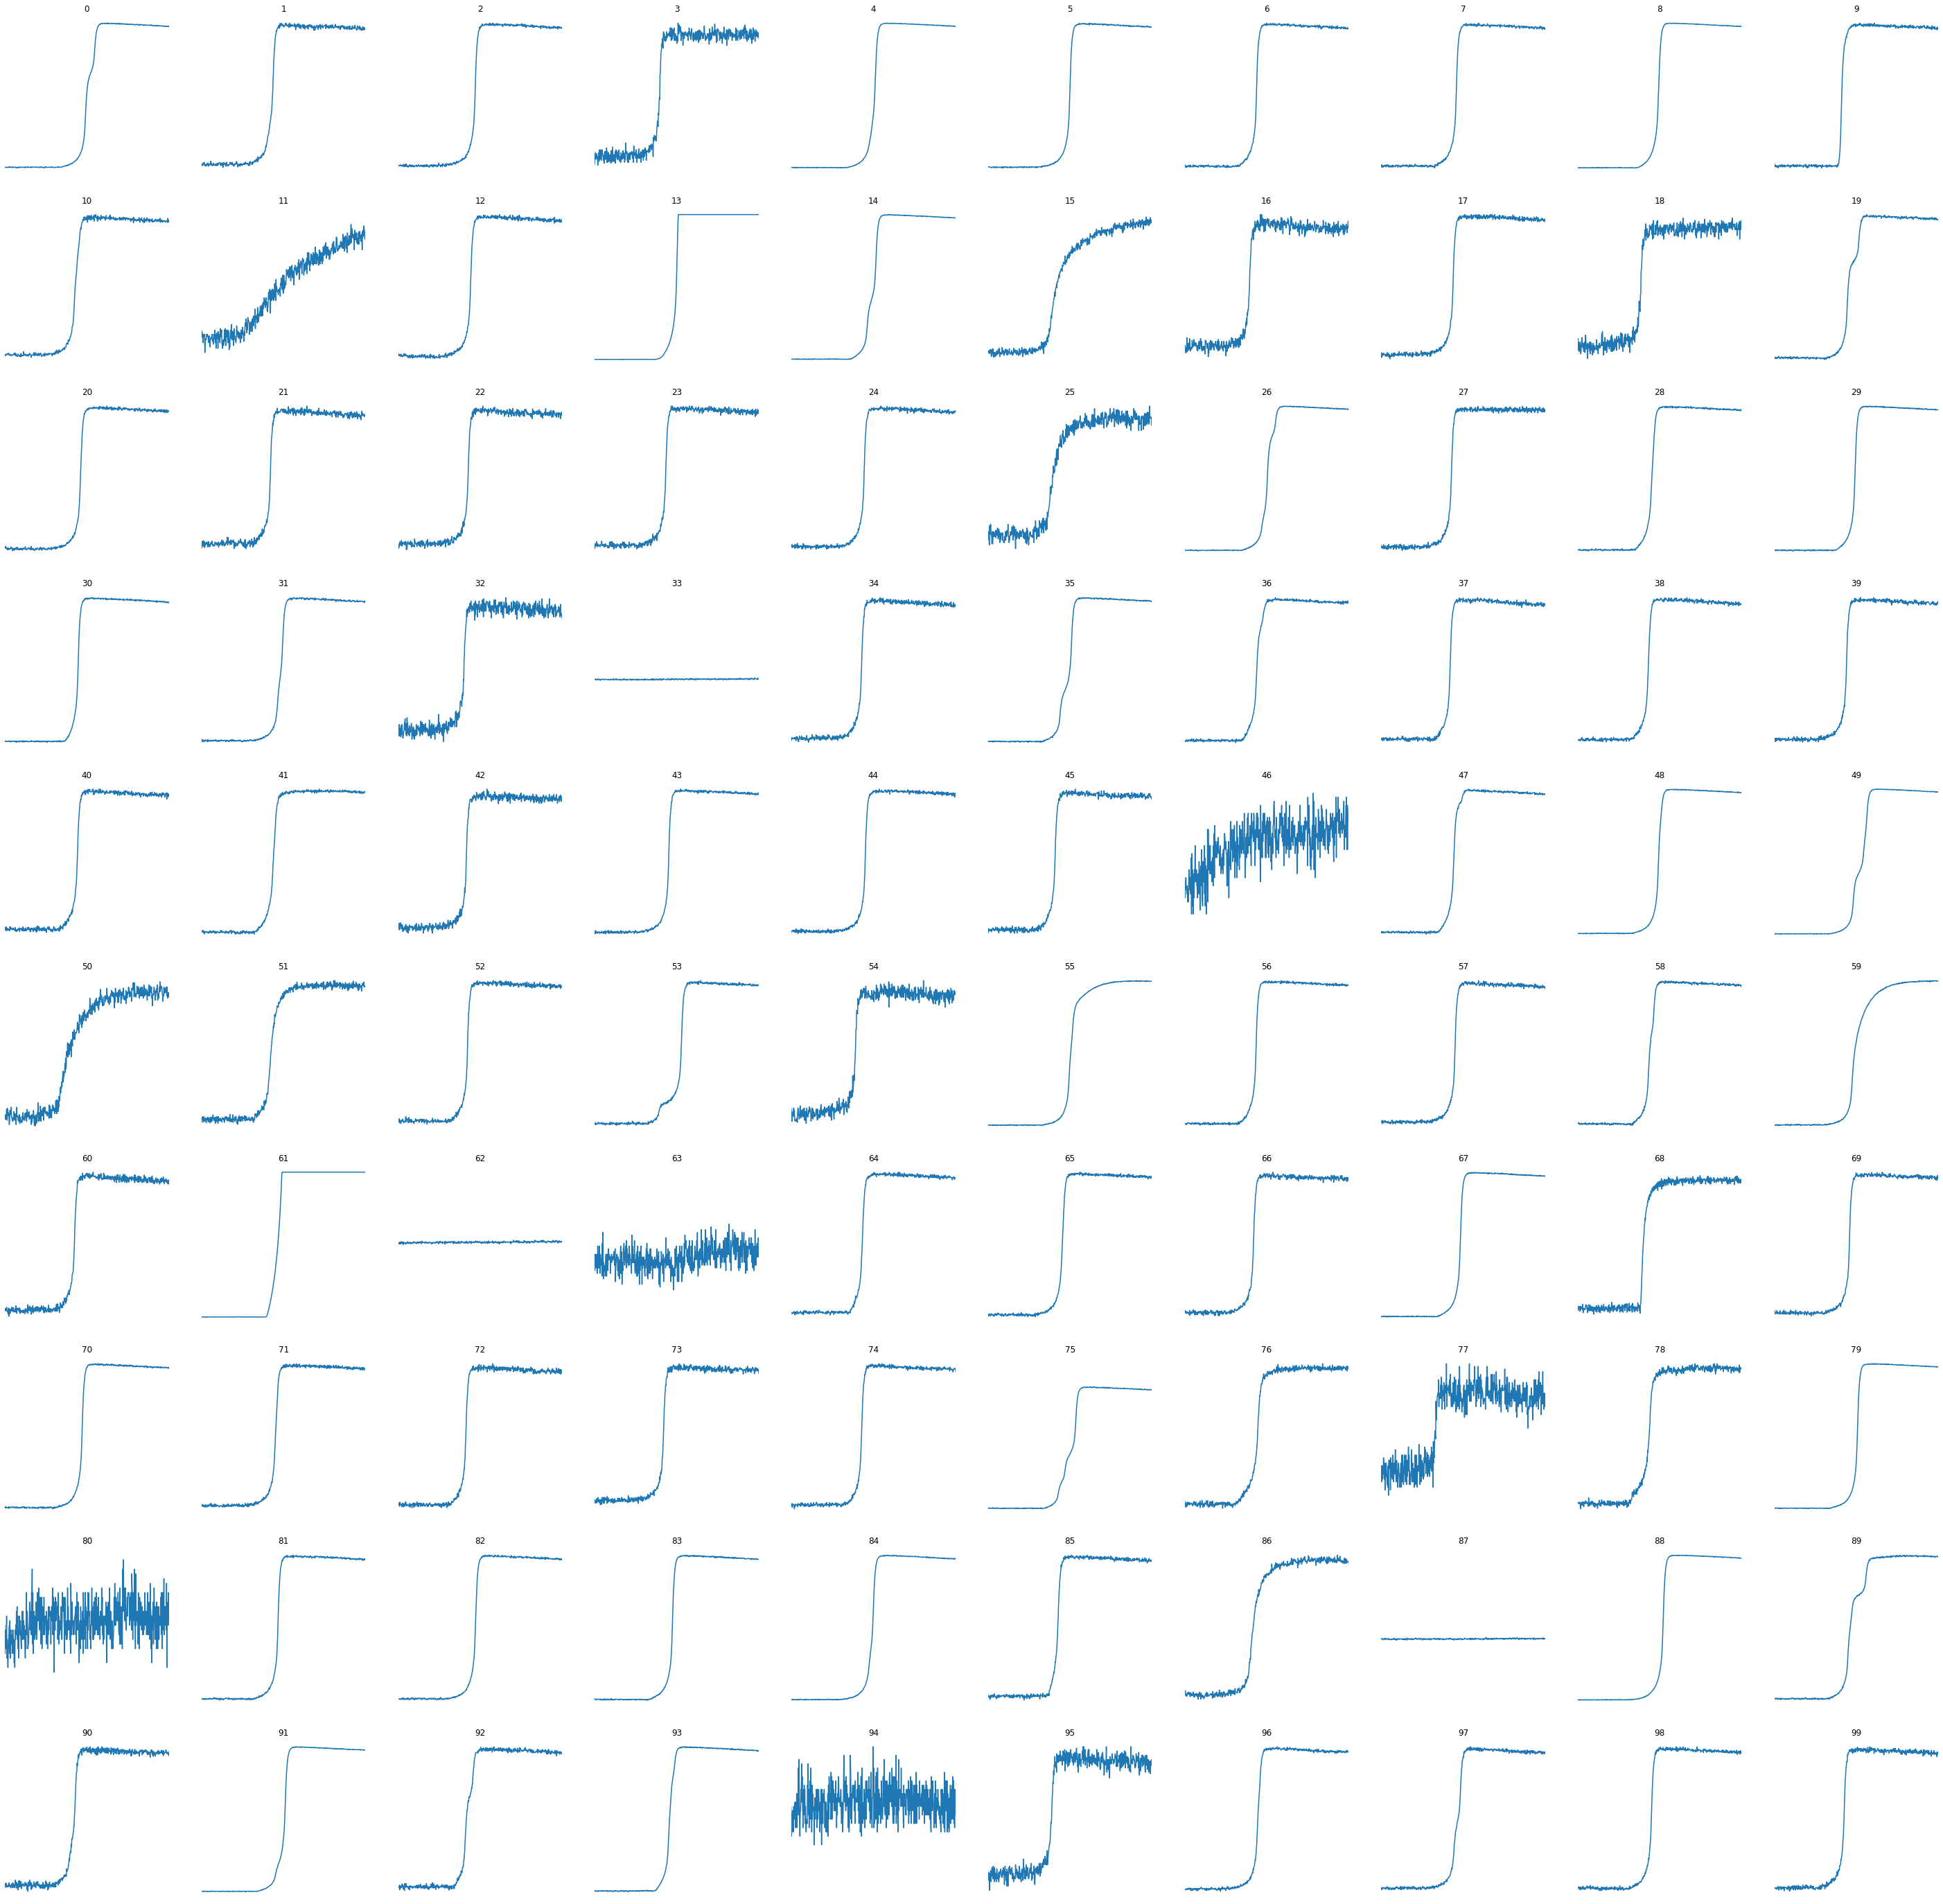

In [9]:
plot_waveform = t1_df.iloc[0, 9:]
plot_x = np.arange(0, len(plot_waveform))

plt.plot(plot_x, plot_waveform)
plt.xlabel('Time')
plt.ylabel('ADC')
plt.show()

fig, ax = plt.subplots(10, 10, figsize=(50, 50))
for i in range(100):
    temp_waveform = t1_df.iloc[i, 9:]
    temp_x = np.arange(0, len(temp_waveform))

    ax[i//10,i%10].plot(temp_x, temp_waveform)
    ax[i//10,i%10].set_title(i)
    ax[i//10,i%10].set_xlim(800,1300)
    ax[i//10,i%10].set_axis_off()

plt.show()
    